<a href="https://colab.research.google.com/github/seap-udea/AreciboWow/blob/main/AreciboWow_HIssModel_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arecibo Wow!
## The HIss model

### Maintained by: Jorge I. Zuluaga

### Prerrequisites

In [2]:
import sys
if 'colab' in sys.modules:
    !pip install -Uq astropy

### Constants

In [48]:
import scipy.constants as const
import astropy.constants as apyconst
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
kB = const.k # Boltzmann constant
h = const.h # Planck constant
c = const.c # speed of light
e = const.e # elementary charge
mH = const.m_p # mass of hydrogen atom
pc = apyconst.pc.value # parsec
Jy = 1e-26 # W/m^2/Hz Jansky

# 21 cm line
g1 = 3 # statistical weight of the excited state
g0 = 1 # statistical weight of the ground state

### Basic properties of 21 cm radiation

In [5]:
# Frequency 
nu10 = 1420.40575177e6 # Hz
eps10 = h*nu10 # Joules
print(f"Quantum energy: {eps10:.7g} J = {eps10/e:.7g} eV")

# Characteristic temperature
Tstar = h*nu10/kB # K
print(f"Characteristic temperature: {Tstar:.7g} K")

# Spontaneous decay rate
A10 = 2.85e-15 # s^-1
tau10 = 1/A10 # s
print(f"Spontaneous decay time: {tau10:.2g} s = {tau10/const.year:.2g} years")

Quantum energy: 9.411708e-25 J = 5.874326e-06 eV
Characteristic temperature: 0.06816872 K
Spontaneous decay time: 3.5e+14 s = 1.1e+07 years


Reference: Field, George B. "Excitation of the hydrogen 21-cm line." Proceedings of the IRE 46.1 (1958): 240-250. [url](https://www.astro.rug.nl/~saleem/courses/EoRCourse/Field1958.pdf)

### Doppler broadening

Doppler broadening is:

$$
\Delta f_{\mathrm{FWHM}}=\sqrt{\frac{8 k T \ln 2}{m c^2}} f_0
$$

In [6]:
T = 100 # K
deltaf = np.sqrt(8*kB*T*np.log(2)/(mH*c**2))*nu10

print(f"Doppler width: {deltaf:.2g} Hz")

Doppler width: 1e+04 Hz


Text(0, 0.5, 'Doppler broadening [kHz]')

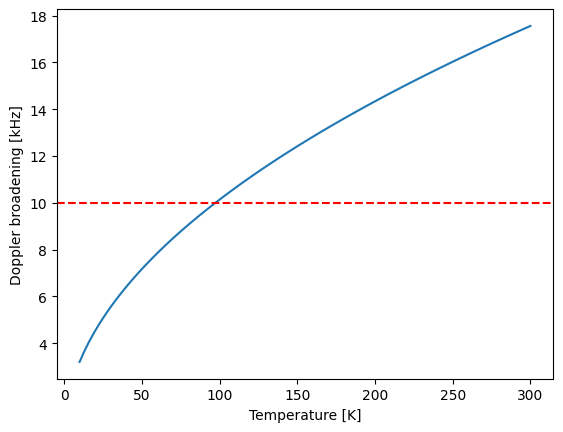

In [7]:
Ts = np.linspace(10, 300, 100)
deltafs = np.sqrt(8*kB*Ts*np.log(2)/(mH*c**2))*nu10
plt.plot(Ts, deltafs/1e3)
plt.axhline(10, color='r', linestyle='--')
plt.xlabel("Temperature [K]")
plt.ylabel("Doppler broadening [kHz]")

Threshold temperature:

$$
T_{K,\mathrm{Wow!}} \leq \frac{mc^2}{8k_B\ln 2}\left(\frac{\Delta \nu_\mathrm{Wow!}}{\nu_{10}}\right)^2
$$

In [8]:
deltanu_wow = 10e3 # Hz
TWow = mH*c**2*deltanu_wow**2/(8*kB*nu10**2*np.log(2))
print(f"Temperature for a Doppler width of 10 kHz: {TWow:.2g} K")

Temperature for a Doppler width of 10 kHz: 97 K


### ISM properties

In [9]:
nH = 100 # cm^-3
rhoH = nH*mH

print(f"Hydrogen density: {rhoH:.2g} kg/m^3")

Hydrogen density: 1.7e-25 kg/m^3


### Intensity

Intensity was estimated between $54-212$ Jy:

In [10]:
Swow = 54*Jy # W/m^2/Hz

Assuming that the emmission was distributed in the whole bandwidth $10$ kHz it implies a flux of:

In [11]:
Iwow = Swow*deltanu_wow
print(f"Flux density for a Doppler width of 10 kHz: {Iwow:.2g} W/m^2")

Flux density for a Doppler width of 10 kHz: 5.4e-21 W/m^2


### Distance

In [12]:
nu_wow = 1420.4556e6 # Hz
deltaf_wow = nu_wow - nu10
print(f"Frequency difference: {deltaf_wow:.7g} Hz")

vrel = c*deltaf_wow/nu10
print(f"Relative velocity: {vrel:.3g} m/s = {vrel/1e3:.3g} km/s")

Frequency difference: 49848.23 Hz
Relative velocity: 1.05e+04 m/s = 10.5 km/s


Galactic coordinates:

In [13]:
deg = np.pi/180 # rad
rad = 1/deg
l = 11.664*deg
b = -18.916*deg
h = 1.4e3*pc # m

The Oort's relationships are:

$$
\begin{aligned}
V_r= & -U_{\odot} \cos l \cos b-V_{\odot} \sin l \cos b-W_{\odot} \sin b + d \cdot(K+A \sin 2 l+C \cos 2 l) \cos b \cos b, \\
V_l= & U_{\odot} \sin l-V_{\odot} \cos l + d \cdot(A \cos 2 l+B-C \sin 2 l) \cos b, \\
V_b= & U_{\odot} \cos l \sin b+V_{\odot} \sin l \sin b-W_{\odot} \cos b -d \cdot(K+A \sin 2 l+C \cos 2 l) \sin b \cos b,
\end{aligned}
$$

Source: Wang, F., et al. "Local stellar kinematics and Oort constants from the LAMOST A-type stars." Monthly Notices of the Royal Astronomical Society 504.1 (2021): 199-207. [url](https://watermark.silverchair.com/stab848.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA1MwggNPBgkqhkiG9w0BBwagggNAMIIDPAIBADCCAzUGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMbrxE3IYOyjmm9QLDAgEQgIIDBsbCqF23uU0wLAp8l2ErG2gFUpRpFX7lMBILq37kDk2snPy1OwyUgWVmrWIP_J_j0Hr1oobcfbyCWVPWuX5qx2gffMsEOHmM_u1rP9TMaCZcAkIFmFp47YgqJwsJDxW7YI3P6NpY_hDNY8LFvdgqXJamWLWzslNjvBBsmuEI3yUkNCsWnUKJubruu4317C6Wh9h-sAMLmSajM4nNQsfRA1TV-Xvr4v2p3W3lOio6q70RERAvxDxDd_mpyvhqWEODUviTPyH8DRZPM5pT8-_7wwXk3NeEGKQBfQRavrypex7t6KOz4HUHSWH5dap9NFVy4roidZ1q7dQoBa6sdQr0B3flY8weJZbRCao9VjwfaBLcHdCVcsVysn35ugmLOufoUpuzXmjrr-_dVCjyOgXEjbo22SyUHI_T_nS87K_rOerQixWdnmQ0xfvfK3NSa-OqP_Z3zYunBJKvNpt0qGydI3_kjk_n1izv_haK7HLmY5svVGBD30RSXptU_C99KC89oyIr6NcVFqxX49N9zoh6rDRPl_JTqK5kYvT8Q_cowfoQh-5CQDhRu_5atGBfxRVv30e4LLMZRpPqCovK4lR3r_bfwCikI_4cbUbENz6OUCp6zNTaYlAK_BRQ5SvFIpxtb7TrNpmnJmURxui-tTLv7jnPIY4YM-_fEOonyJEjnJH12Nr15ntIOWbmQNPDohUaA7jnKg0tZ5MPqh91LQo9xN13iEDVpKQPQjTnkL1Gt6ip5PWd5F9pyChHlVH_boqUO87_W2uesh9qk1TLt8AhNkc4oVuyIfiHsx3snLOXw6sDE7vvH23YvMAoCoy4ralkhFR1zKHCeq7VtU75yZvZ3fDotlR6sDyZrOyD07f9vlWm0VgU-)

In [14]:
# Parameters
Usun = 11.69; dUsun = 0.68 # km/s
Vsun = 10.16; dVsun = 0.51 # km/s
Wsun = 7.67; dWsun = 0.10 # km/s
A = 16.31; dA = 0.89 # km/s/kpc
B = -11.99; dB = 0.79 # km/s/kpc
C = -3.10; dC = 0.48 # km/s
K = -1.25; dK = 1.04 # km/s/kpc

In [15]:
def vradial(d,l,b):
    vr = d*(K + A*np.sin(2*l) + C*np.cos(2*l))*np.cos(b)*np.cos(b)
    return vr

def distance(vr,l,b,A=A,C=C,K=K):
    d = vr/((K + A*np.sin(2*l) + C*np.cos(2*l))*np.cos(b)*np.cos(b))
    return d

In [16]:
l*rad, b*rad

(11.664000000000001, -18.916)

In [17]:
ds = np.linspace(0, 10, 100)
vrs = vradial(ds, l, b)

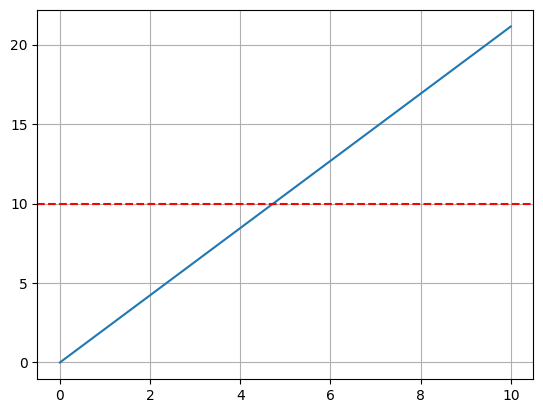

In [18]:
plt.plot(ds, vrs)
plt.axhline(10, color='r', linestyle='--')
plt.grid()

In [19]:
d = (vrel/1e3)/(A*np.sin(2*l))
d

1.6289776842489674

In [20]:
d = distance(vrel/1e3,l,b)
d

4.977203101743039

In [21]:
vrel

10521.024277769113

In [22]:
A = 16.31; dA = 0.89 # km/s/kpc
B = -11.99; dB = 0.79 # km/s/kpc
C = -3.10; dC = 0.48 # km/s
K = -1.25; dK = 1.04 # km/s/kpc

def distance(vr,l,b,A,C,K):
    d = vr/((K + A*np.sin(2*l) + C*np.cos(2*l))*np.cos(b)**2)
    return d

Nvals = 100000
As = np.random.normal(A,dA,Nvals)
Bs = np.random.normal(B,dB,Nvals)
Cs = np.random.normal(C,dC,Nvals)
Ks = np.random.normal(K,dK,Nvals)

ds = distance(vrel/1e3,l,b,As,Cs,Ks)
ds = ds[(ds>0)&(ds<10)]

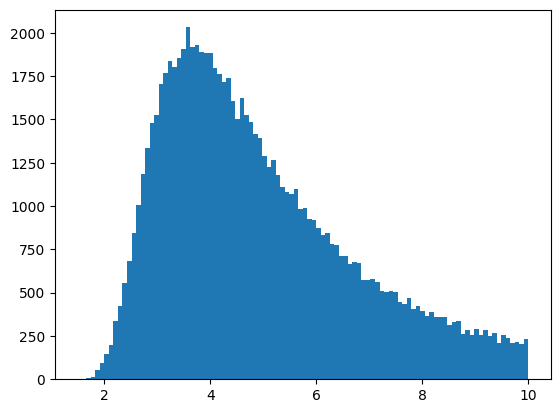

In [23]:
plt.hist(ds,100);

In [24]:
np.mean(ds), np.std(ds)

(4.929540460831228, 1.7976171552784086)

Let's plot the distance range:

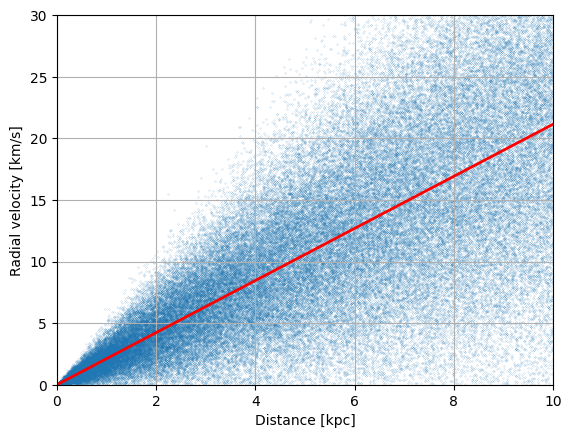

In [25]:
def vradial(d,l,b,A,C,K):
    vr = d*(K + A*np.sin(2*l) + C*np.cos(2*l))*np.cos(b)*np.cos(b)
    return vr


Nvals = 100000
ds = np.linspace(0, 10, Nvals)
As = np.random.normal(A,dA,Nvals)
Bs = np.random.normal(B,dB,Nvals)
Cs = np.random.normal(C,dC,Nvals)
Ks = np.random.normal(K,dK,Nvals)
vrs = vradial(ds, l, b, As, Cs, Ks)

cond = (vrs>0)
plt.scatter(ds[cond], vrs[cond], s=0.01)

ds = np.linspace(0, 10, 100)
vrs = vradial(ds, l, b, A, C, K)
plt.plot(ds,vrs,'r-', lw=2)

plt.xlabel("Distance [kpc]")
plt.ylabel("Radial velocity [km/s]")
plt.ylim(0,30)
plt.grid()
plt.margins(0)

Assumming that the galaxy is a flat disk having a height $h_0$, the distance at which the disk will ends at a latitude of $b$ is obtained from the simple relationship:

$$
h_0 = d\sin b
$$

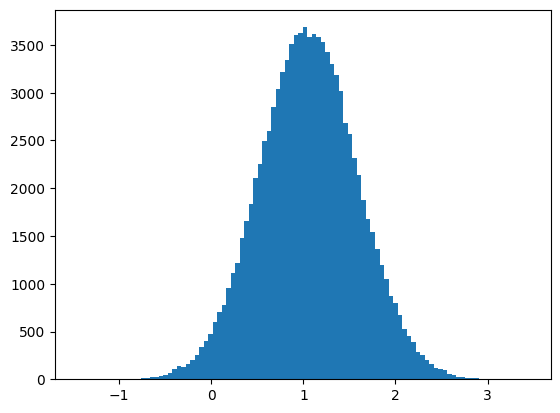

In [26]:
vrs = vradial(0.5, l, b, As, Cs, Ks)

plt.hist(vrs,100);

In [27]:
h0 = 0.40*pc
d = h0/np.sin(abs(b))
print(f"Distance to the Sun (WNM): {d/pc:.2g} pc")

h0 = 0.150*pc
d = h0/np.sin(abs(b))
print(f"Distance to the Sun (WNM): {d/pc:.2g} pc")

Distance to the Sun (WNM): 1.2 pc
Distance to the Sun (WNM): 0.46 pc


In [28]:
b*rad

-18.916

Attention to: https://www.astro.uni-bonn.de/hisurvey/euhou/

### Luminosity

For a beamed source the luminosity is estimated by:

$$
L(\nu)=\frac{4 \pi d^2 S(\nu)}{\Delta \Omega}
$$
where $S_\nu$ is the flux density in units of W/m$^2$/Hz.

In [29]:
deg = np.pi/180 # rad
arcmin = 1/60*deg # degrees

# Beamsize of OSU (Ohio State University) radio telescope
teta = 9*arcmin # degrees
dOmega = np.pi*teta**2 # steradians
dwows = np.array([0.5, 1.2, 4.8])*1e3*pc # m

# Isotropic luminosity
Lsun = 3.828e26 # W
Ls = 4*np.pi*dwows**2*Iwow
print(f"Isotropic luminosity: {Ls} W = {Ls/Lsun} Lsun")

# Beamed luminosity
Lbeam = Ls/dOmega
print(f"Beamed luminosity: {Lbeam} W = {Lbeam/Lsun} Lsun")

Isotropic luminosity: [1.61526850e+19 9.30394654e+19 1.48863145e+21] W = [4.21961467e-08 2.43049805e-07 3.88879688e-06] Lsun
Beamed luminosity: [7.50166381e+23 4.32095835e+24 6.91353336e+25] W = [0.00195968 0.01128777 0.18060432] Lsun


### Conditions for maser emission

Let's compute the condition for inversion:

$$
\frac{dn_\nu}{d\nu}=\frac{8 \pi}{h c^3} k_B T_b\frac{R^2}{d^2}>2\times 10^{-26}
$$

In [30]:
# Basic properties
Tb = 1e10
R = 30e3 # m
d = 0.1*pc # m

dndnu = 8*np.pi*kB/(h*c**3)*Tb*(R/d)**2
dndnu

2.817888934734385e-79

The degree of inversion in this case will be:

$$
f \approx \frac{\nu_{10}}{\nu_{\mathrm{Ly}\alpha}}
$$

In [31]:
# Lyman alpha
lamb_lya = 1215.67e-10 # m
nu_lya = c/lamb_lya # Hz

f = nu10/nu_lya

print(f"Ratio of 21 cm to lyman alpha frequency: {f:.3g} Hz")

Ratio of 21 cm to lyman alpha frequency: 5.76e-07 Hz


 Gain:

 $$
 \gamma_0=\frac{3}{32 \pi \nu_{10}^2 \Delta \nu} c^2 A_{10} n_{\mathrm{H}} f
 $$

First compute the constant factor:

In [32]:
const_gamma0 = 3/(32*np.pi*nu10**2*deltanu_wow)*c**2*A10

print(f"Constant factor: {const_gamma0:e}")

Constant factor: 3.788636e-22


In [33]:
nH/1e8

1e-06

In [34]:
nH = 4e5/(1e-2)**3

gamma0L = const_gamma0*nH*f*pc

print(f"Gain factor: {gamma0L:.2g}, amplification factor = {np.exp(gamma0L):.2g}")

Gain factor: 2.7, amplification factor = 15


### Dicke Superradiance

Distance between atoms:

$$
d = \frac{1}{n_H^{1/3}}
$$

Text(0, 0.5, 'Mean separation [m]')

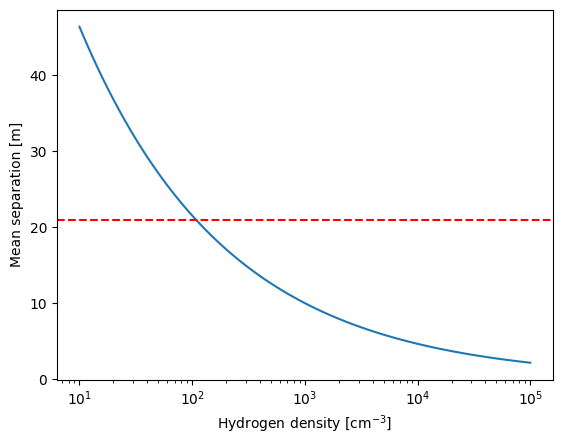

In [35]:
nHs = np.logspace(1, 5, 100)
dHs = 1/nHs**(1/3)
plt.semilogx(nHs, 100*dHs)
plt.axhline(21, color='r', linestyle='--')
plt.xlabel(r"Hydrogen density [cm$^{-3}$]")
plt.ylabel(r"Mean separation [m]")

#### Case of small number of atoms

Idealized HI radiation:

$$
I_{\mathrm{DSR}}=N I_s \cosh ^{-2}\left[N A_{10}\left(t-t_{\mathrm{D}}\right)\right]
$$

where:

$$
I_{s} = N h\nu_{10} A_{10}
$$

and 

$$
t_D=(NA_{10})^{-1}\ln N
$$

In [36]:
N = 940

Is = N*h*nu10*A10
print(f"Spontaneous intensity: {Is:.2g} W")

tD = np.log(N)/(N*A10)
print(f"Delay time: {tD:.2g} s = {tD/const.year:.2g} years")

tR = 1/(A10*N)
print(f"Characteristic time of superradiance: {tR:.2g} s = {tR/const.year:.2g} years")


Spontaneous intensity: 1.6e+17 W
Delay time: 2.6e+12 s = 8.1e+04 years
Characteristic time of superradiance: 3.7e+11 s = 1.2e+04 years


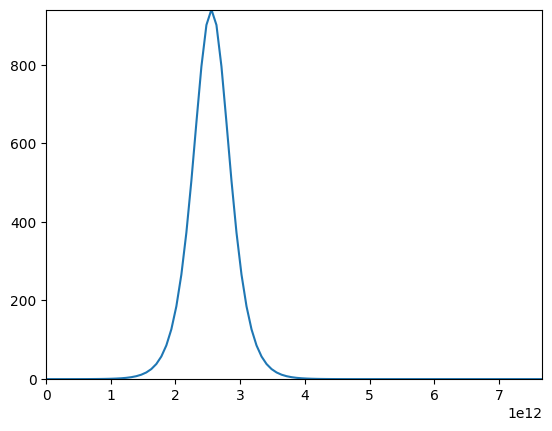

In [37]:
ts = np.linspace(0,3*tD,100)
IDRSs = N/np.cosh(N*A10*(ts-tD))**2

plt.plot(ts, IDRSs)
plt.margins(0)

#### Case of large number of atoms

We want to reproduce results in section 3.2 of RH2016.

The characteristic timescale of superradiance for a large sample is:

$$
T_{\mathrm{R}}= \frac{16 \pi\tau_{\mathrm{sp}}}{3 \eta n_H \lambda^2 L}
$$

For a small sample volume:

$$
T_{\mathrm{R}}=\frac{\tau_{\mathrm{sp}}}{\eta n_H \lambda^3}
$$

In [38]:
print(f"Decay time: {tau10:e}")

Decay time: 3.508772e+14


In [39]:
eta = 0.01
nH = 10/1e-2**3 # m^-3
lambda10 = c/nu10

TR = tau10/(eta*nH*lambda10**3)
print(f"Characteristic time of recombination: {TR:.2e} s = {TR/const.year:.2e} years")

Characteristic time of recombination: 3.73e+11 s = 1.18e+04 years


Timescales:

$$
T_R = 10^{3}\;\mathrm{s} \left(\frac{10^{9}\;\mathrm{m}}{L}\right)
$$

In [50]:
%%file DSR-schema.dat
tau,ISR
3.0120481927710614,0.008474576271186418
93.37349397590359,0.008474576271186418
183.73493975903605,0.008474576271186418
213.85542168674695,0.03389830508474567
225.90361445783125,0.10169491525423702
233.43373493975892,0.18644067796610164
237.95180722891556,0.2923728813559321
243.97590361445774,0.5211864406779663
254.5180722891566,0.9576271186440679
260.5421686746987,1.3559322033898304
265.06024096385534,1.8389830508474574
268.0722891566264,2.139830508474576
274.0963855421686,2.6101694915254234
275.60240963855415,2.694915254237288
281.62650602409633,2.8050847457627115
287.6506024096384,2.694915254237288
290.6626506024096,2.6059322033898304
295.18072289156623,2.139830508474576
299.69879518072287,1.8474576271186438
304.2168674698795,1.3474576271186438
310.2409638554217,0.9618644067796609
314.7590361445783,0.597457627118644
328.3132530120481,0.20338983050847448
334.3373493975903,0.10593220338983045
343.37349397590356,0.029661016949152685
353.91566265060237,0.004237288135593431
365.9638554216866,0.03389830508474567
376.50602409638543,0.11440677966101687
384.03614457831316,0.2076271186440679
411.14457831325285,0.7330508474576272
418.6746987951807,0.8686440677966099
426.2048192771083,0.9872881355932206
435.24096385542157,1.0211864406779658
442.7710843373494,0.9830508474576272
450.301204819277,0.8728813559322033
457.83132530120474,0.7457627118644066
466.867469879518,0.5381355932203387
477.4096385542168,0.3347457627118642
490.9638554216866,0.18220338983050866
503.012048192771,0.0932203389830506
512.0481927710842,0.038135593220339103
524.0963855421686,0.008474576271186418
537.6506024096385,0
555.7228915662649,0.016949152542372836
570.7831325301204,0.04661016949152508
590.3614457831325,0.11440677966101687
611.44578313253,0.20338983050847448
631.0240963855421,0.27542372881355925
653.6144578313252,0.3220338983050848
680.7228915662649,0.27966101694915224
698.7951807228915,0.21610169491525433
721.3855421686745,0.1313559322033897
748.4939759036142,0.05932203389830537
783.1325301204819,0.016949152542372836
813.2530120481925,0.004237288135593431
825.301204819277,0
852.4096385542167,0
893.0722891566264,0.01271186440677985
945.7831325301203,0.03389830508474567
987.9518072289155,0.05084745762711851
1018.0722891566264,0.05084745762711851
1046.6867469879514,0.05084745762711851
1079.8192771084334,0.04661016949152508
1121.9879518072285,0.038135593220339103
1182.2289156626503,0.029661016949152685
1225.903614457831,0.016949152542372836
1271.0843373493972,0.01271186440677985
1340.3614457831322,0.008474576271186418
1448.7951807228912,0.004237288135593431
1496.9879518072285,0.008474576271186418

Overwriting DSR-schema.dat


In [51]:
import pandas as pd

In [52]:
DSR = pd.read_csv('DSR-schema.dat', sep=',', comment='#')
DSR.head(10)

,tau,ISR
0,3.012048,0.008475
1,93.373494,0.008475
2,183.734940,0.008475
3,213.855422,0.033898
4,225.903614,0.101695
5,233.433735,0.186441
6,237.951807,0.292373
7,243.975904,0.521186
8,254.518072,0.957627
9,260.542169,1.355932


In [130]:
from scipy.interpolate import interp1d
ISRfun = interp1d(DSR.tau, DSR.ISR, kind='cubic')

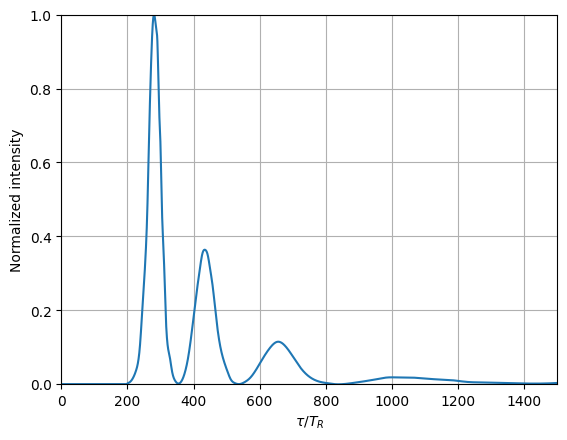

In [131]:
taus = np.linspace(DSR.tau.iloc[0], DSR.tau.iloc[-1],10000)
cond = taus<200
ISRs = ISRfun(taus)*1e-4
ISRs[cond] = 0

plt.plot(taus,ISRs/np.max(ISRs))
plt.xlabel(r'$\tau/T_R$')
plt.ylabel(r'Normalized intensity')
plt.xlim(0,1500)
plt.margins(0)
plt.grid()

In [140]:
L = 1e14/1e2 # cm
print(f"Length = {L/pc} pc")
TR = 1e3*(1e11/(L*1e2))
print(f"Characteristic time of superradiance: {TR:.2g} s")
taue = L/c # s
print(f"Traverse time: {taue:.2g} s = {taue/const.hour:.2g} hours")
print(f"Dephasing/relaxation time: {taue/TR}")

Length = 3.240779289444365e-05 pc
Characteristic time of superradiance: 1 s
Traverse time: 3.3e+03 s = 0.93 hours
Dephasing/relaxation time: 3335.6409519815206


Interpolation:

In [135]:
taus = np.linspace(DSR.tau.iloc[0], DSR.tau.iloc[-1],1000)
cond = taus<200
ISRs = ISRfun(taus)*1e-4
ISRmax = np.max(ISRs)
ISRs[cond] = 0
ts = taus*TR + taue
imax = np.argmax(ISRs)
tmax = ts[imax]

ies = np.arange(len(ISRs))
cond = (ISRs/ISRmax>0.5)
ihalfl,ihalfu = ies[cond][0],ies[cond][-1]
dtau = ts[ihalfu]-ts[ihalfl]

print(f"Peak emission time: {tmax/const.minute}")
print(f"Half width: {dtau/const.minute}")

Peak emission time: 60.28017793203881
Half width: 0.6978866416617393


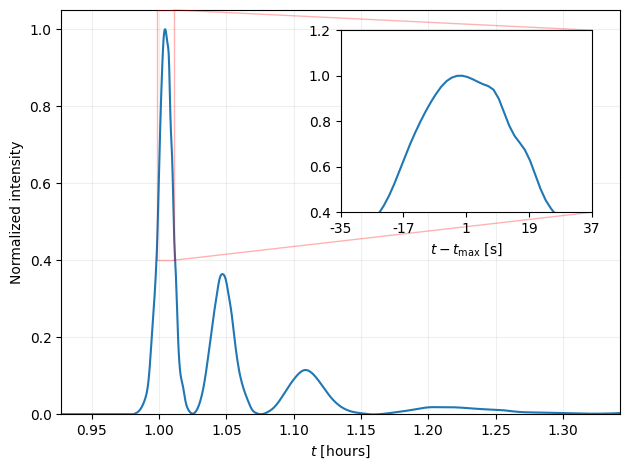

In [137]:
#tunit = const.minute 
tunit = const.hour ; nunit = 'hours'

fig, mnax = plt.subplots()

iax = mnax.inset_axes(
   [0.5, 0.5, 0.45, 0.45],# [x, y, width, height]
   xlim=[(tmax-1.1*dtau/2)/tunit, (tmax+1.1*dtau/2)/tunit], 
   ylim=[0.4, 1.05], # sets viewport & tells relation to main axes
   xticklabels=[], yticklabels=[]
)

mnax.plot(ts/tunit,ISRs/ISRmax)
iax.plot(ts/tunit,ISRs/ISRmax)

mnax.set_xlabel(rf'$t$ [{nunit}]')
mnax.set_ylabel(r'Normalized intensity')
mnax.margins(0)
mnax.indicate_inset_zoom(iax, edgecolor="red", alpha=0.3)
mnax.grid(zorder=-1000,alpha=0.2)

# Set ticks
xtl = []
iax.set_xticks(iax.get_xticks())
for xt in iax.get_xticks():
   xtl.append(f"{xt*tunit-tmax:.0f}")
iax.set_xticklabels(xtl)
iax.set_xlabel(r"$t-t_{\mathrm{max}}$ [s]")

ytl = []
iax.set_yticks(iax.get_yticks())
for yt in iax.get_yticks():
   ytl.append(f"{yt:.1f}")
iax.set_yticklabels(ytl)

fig.tight_layout();
fig.savefig('DSR.png')

Intensity of the example region in RH2016:

In [148]:
F = 1e-22*1e-7*(1e-2)**(-2) # W/m^2
print(f"Flux density: {F:.2g} W/m^2")

Flux density: 1e-25 W/m^2


Intensity in Jansky:

In [150]:
IDSR = F/10e3
print(f"Spectral flux density = {IDSR/Jy:.2g} Jy")

Spectral flux density = 0.001 Jy


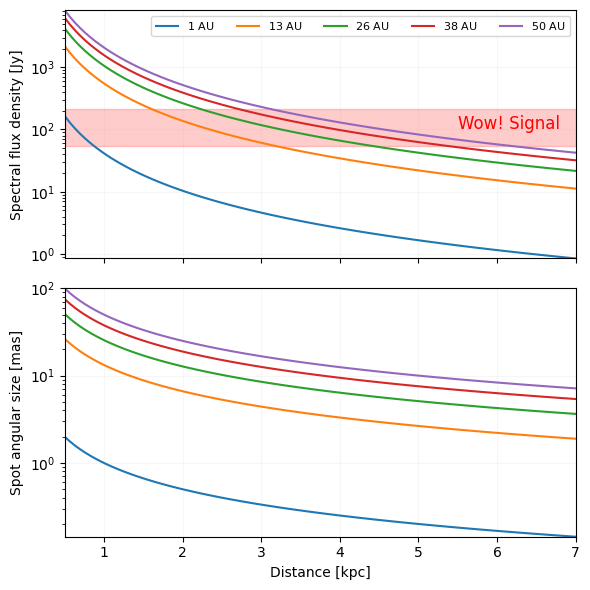

In [193]:
w = 9e5 # m 
ds = np.linspace(0.5,7,100) # kpc

fig,axs = plt.subplots(2,1,figsize=(6,6),sharex=True)

ax = axs[0]
for Ds in np.linspace(1,50,5)*const.au:
    IDSRs = (Ds/w)*(0.5/ds)**2
    ax.semilogy(ds, IDSRs/1e3, label=rf'${Ds/const.au:.2g}$ AU')

ax.axhspan(54,212,color='r',alpha=0.2)
ax.text(6.8,100, 'Wow! Signal', color='r', fontsize=12, ha='right')
#ax.set_xlabel("Distance [kpc]")
ax.set_ylabel("Spectral flux density [Jy]")
ax.legend(loc='upper right',ncols=5,fontsize=8)
ax.grid(alpha=0.1)
ax.margins(0)

# Show the angular size
ax = axs[1]
for Ds in np.linspace(1,50,5)*const.au:
    tetaDSRs = Ds/(ds*1e3*pc)*rad*3600*1e3
    ax.semilogy(ds, tetaDSRs, label=rf'$D_s = {Ds/const.au:.2g}$ AU')

ax.set_xlabel("Distance [kpc]")
ax.set_ylabel("Spot angular size [mas]")
#ax.legend()
ax.grid(alpha=0.1)
ax.margins(0)

fig.tight_layout()
fig.savefig('IDSR-distance.png')